#### Load LLM and env varibales

In [3]:
from dotenv import load_dotenv
load_dotenv()
from langchain_groq import ChatGroq
llm = ChatGroq(model="llama-3.1-8b-instant")

#### Define the State

In [5]:
from typing_extensions import TypedDict

class State(TypedDict):
    topic: str
    characters:str
    settings:str
    premises:str
    story_intro:str

#### Creating a Nodes

In [8]:
### Generating a Characters
def generate_characters(state:State):
    """Generating The Characters"""
    msg = llm.invoke(f"Create a two character names and brief traits for a story about {state["topic"]}")
    return {"characters":msg.content}

def generate_settings(state:State):
    """genarete Settings"""
    msg = llm.invoke(f"Describe a vivid setting for story about {state["topic"]}")
    return {"settings":msg.content}

def generate_premise(state:State):
    """genarate the Premise"""
    msg = llm.invoke(f"Write a one-sentence plot premise for a story about {state["topic"]}")
    return {"premises":msg.content}

def combine_elements(state:State):
    """Combine all the topics[Characters,Settings,Premise]"""
    msg = llm.invoke(f"write a short story using these elements\n"
                     f"characters:{state["characters"]}\n"
                     f"settings: {state["settings"]}\n"
                     f"premise: {state["premises"]}"
    )
    return {"story_intro":msg.content}

#### Graph Constructions

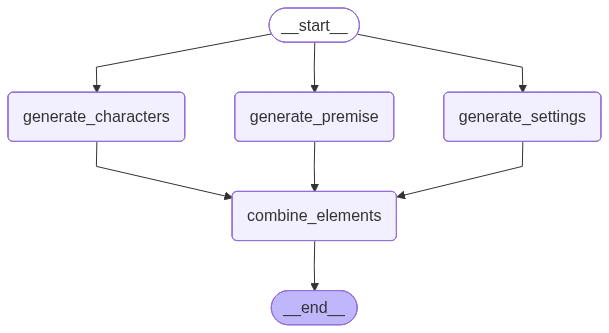

In [10]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

#define the Graph
graph=StateGraph(State)

## Define the Nodes
graph.add_node("generate_characters",generate_characters)
graph.add_node("generate_settings",generate_settings)
graph.add_node("generate_premise",generate_premise)
graph.add_node("combine_elements",combine_elements)

##Define the Routing Edges
graph.add_edge(START,"generate_characters")
graph.add_edge(START,"generate_premise")
graph.add_edge(START,"generate_settings")
graph.add_edge("generate_characters","combine_elements")
graph.add_edge("generate_premise","combine_elements")
graph.add_edge("generate_settings","combine_elements")
graph.add_edge("combine_elements",END)

##Compile The Graph
graph_builder = graph.compile()

##Display the Graph
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [15]:
result = graph_builder.invoke({"topic":"Artificial Intelligence, DataScience"})
print(result["story_intro"])

**Neo-Cygnus Research Facility, Sector Alpha: The AI Research Lab**

Alex Chen hovered over the vast, circular console, her eyes scanning the lines of code streaming across the holographic display. Her fingers danced across the keyboard, tweaking parameters and testing hypotheses. The neural network processor hummed along, processing the vast amounts of data fed into it. This was her domain, where she and her team pushed the boundaries of artificial intelligence.

Ethan Patel, AI Research Director, walked into the lab, his warm smile a beacon of encouragement. "Alex, how's it going? Any breakthroughs?"

Alex's gaze never wavered from the display. "Not yet, Ethan. I'm still trying to iron out the kinks in the new model." Her voice was detached, a testament to her focus.

Ethan chuckled. "Patience, my friend. We're on the cusp of something revolutionary here. I can feel it."

As he approached the console, the blue light surrounding the processor pulsed in response to his proximity. Ethan

In [16]:
### Another way

graph_builder.invoke({"topic":"Who are you"})

{'topic': 'Who are you',
 'characters': 'Here are two character names with brief traits for a story about "Who are you":\n\n**Character 1:**\n- **Name:** Maya Blackwood\n- **Age:** 25\n- **Occupation:** Artist and Psychologist\n- **Personality:** Maya is a free-spirited and empathetic individual who is deeply connected to her emotions and the emotions of those around her. She is often introspective and has a keen sense of observation.\n\n**Character 2:**\n- **Name:** Ethan Ryder\n- **Age:** 30\n- **Occupation:** Writer and Former Detective\n- **Personality:** Ethan is a sharp-witted and analytical individual who is haunted by his past. He is fiercely independent and has a tendency to push people away due to his deep-seated insecurities.\n\nThese two characters will likely have a complex and intriguing dynamic, with Maya\'s empathetic nature drawing Ethan out of his shell, and Ethan\'s analytical mind challenging Maya\'s emotional intuition.',
 'settings': 'Imagine a mystical, moonlit f